# Advertising Sales Channel Prediction
Problem Statement:
Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [91]:
df= pd.read_csv('Advertising.csv', index_col=0)
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [92]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [93]:
df.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [94]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


we have 4 features, all of float types

No null values included

In [96]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:>

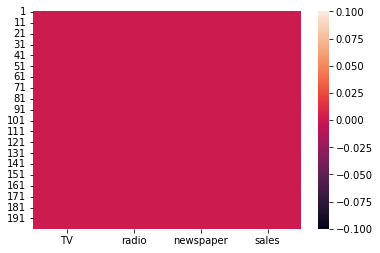

In [97]:
sns.heatmap(df.isnull())

It is cleared from the above heatmap that no missing values are present in the dataset 

In [98]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Conclusion: news paper seems to have outlier/right skewed data, after 75% max is very large

# Checking distribution

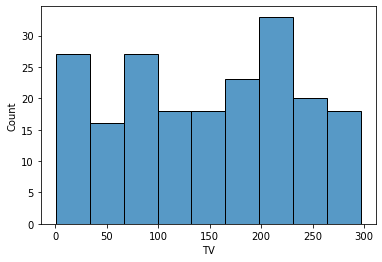

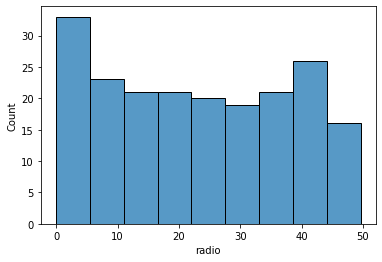

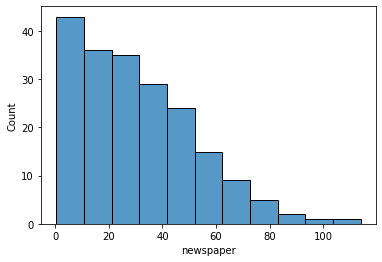

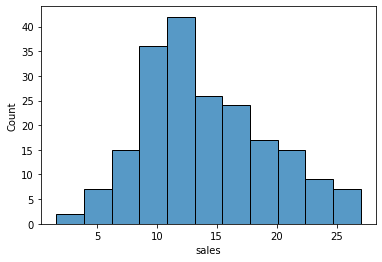

In [99]:
for i in df.columns:
    sns.histplot(df[i])
    plt.show()

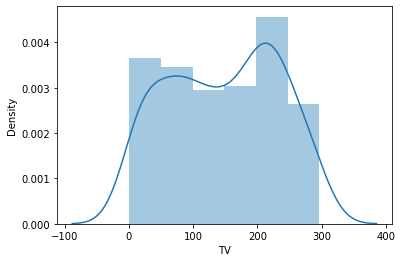

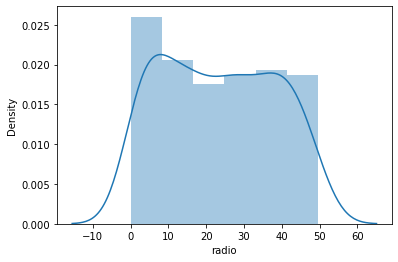

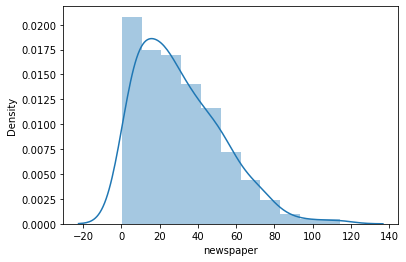

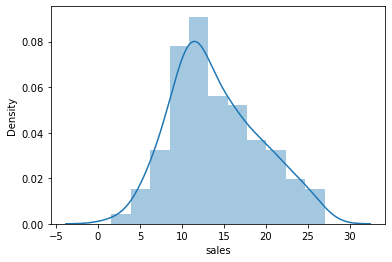

In [100]:
for i in df.columns:
    sns.distplot(df[i],kde=True)
    plt.show()

TV dont have normal distribution

Radio dont have normal distribution

newspaper have alike normal distribution but right skewed

Sales likely to have normal distribution byt right skewed

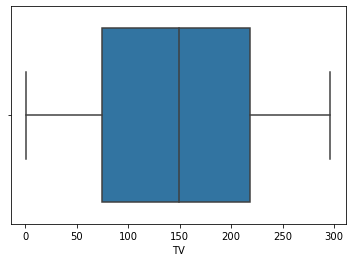

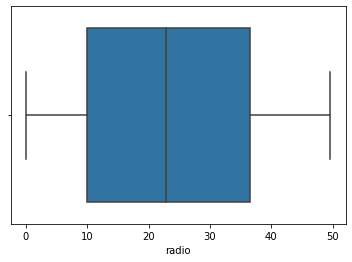

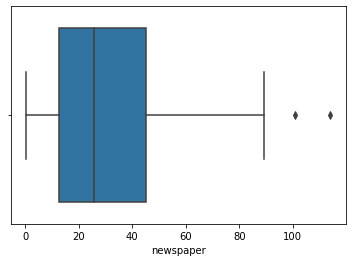

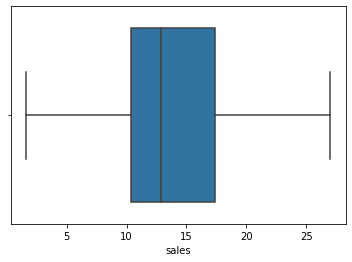

In [101]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

There are no considerable outliers present in the data

# Bi variate Analysis

<AxesSubplot:xlabel='TV', ylabel='sales'>

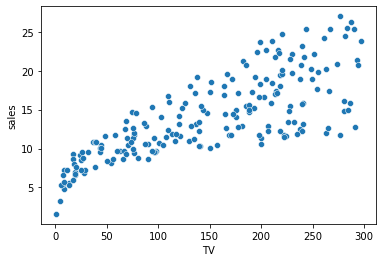

In [102]:
sns.scatterplot(x='TV',y='sales', data=df)

TV has a positive correlation with sales, as the TV advisement increases, sales increases

<AxesSubplot:xlabel='radio', ylabel='sales'>

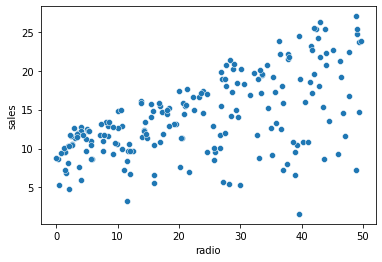

In [103]:
sns.scatterplot(x='radio',y='sales', data=df)

although radio have positive correlation with sales, some points are like higher radio advertisement but still low sales

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

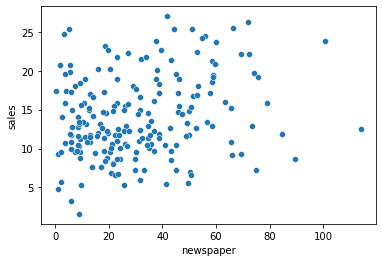

In [104]:
sns.scatterplot(x='newspaper',y='sales',data=df)

data is scattered all over, clearly not visible if newspaper have any good correlation with sales.

<Figure size 1080x720 with 0 Axes>

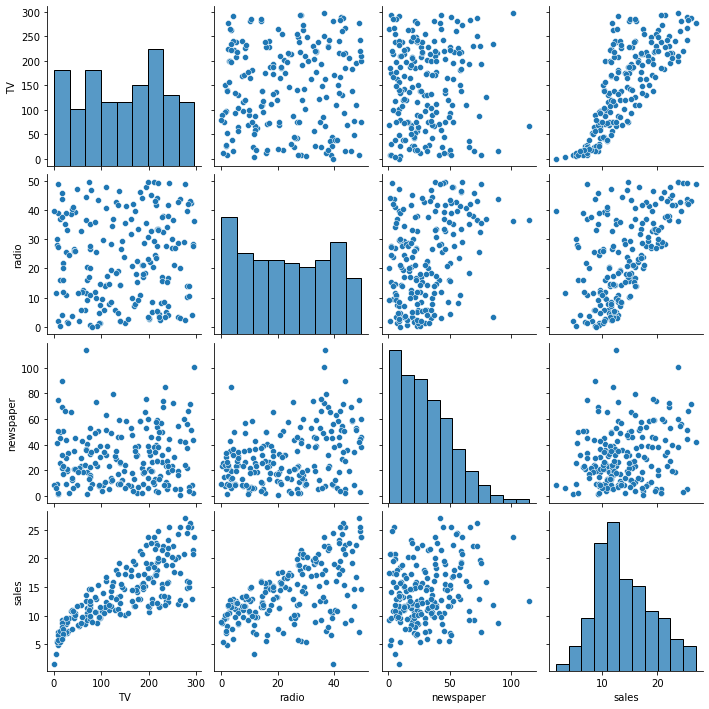

In [105]:
plt.figure(figsize=(15,10))
sns.pairplot(df)
plt.show()

The pair plot shows the data distribution by hist plot and scatter plot.Here we can come to a state that no plenty of outliers are present in the data.

# Correlation

In [106]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

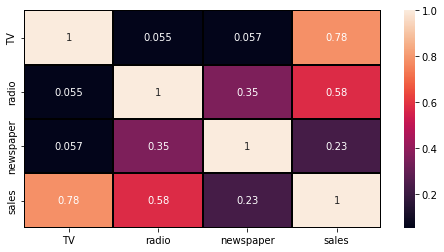

In [107]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),annot=True,linecolor='black',linewidths=.25)

Sales and TV has strong correlation  .78

sales and radio has good correlation .58

sales and newspaper has low correlation .23

# Checking Outliers:

In [108]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

In [109]:
z.iloc[2,2]

1.7835486485539918

In [110]:
df_new=df[(z<3).all(axis=1)]
df_new

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [111]:
print("Old Dataframe",df.shape)
print("New Dataframe",df_new.shape)
print("total_dropped_rows",df.shape[0]-df_new.shape[0])

Old Dataframe (200, 4)
New Dataframe (198, 4)
total_dropped_rows 2


In [112]:
loss_percent=(200-198)/200*100
print(loss_percent,'%')

1.0 %


In [113]:
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

reduced somehow lil bit skewness in newspaper column

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [114]:
x=df_new.iloc[:,0:-1]
x

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [115]:
x.shape

(198, 3)

In [116]:
y=df_new.iloc[:,-1]
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 198, dtype: float64

# VIF to check multicolinearity

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [118]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [119]:
vif_calc()

   VIF Factor   features
0    2.502183         TV
1    3.275285      radio
2    3.126386  newspaper


No multicolinearity found between independent variables, safe range is -5 to +5

# Checking Skewness

In [120]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

Observation: News paper is much skewed

# Transforming data to remove skewness:

In [121]:
from sklearn.preprocessing import power_transform

In [122]:
x=power_transform(x,method='yeo-johnson')

In [123]:
type(x)

numpy.ndarray

In [124]:
x

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154],
       [-1.8204008 ,  1.51543955,  1.76610727],
       [-1.00349358,  0.70309642, -0.10205346],
       [-0.20996049, -0.0876566 , -0.84968895],
       [-1.82264543, -1.62948287, -2.09866461],
       [ 0.652694  , -1.56152179, -0.22649933],
       [-0.88482761, -1.19258569, -0.06553382],
       [ 0.80322028,  0.19357553, -1.59608414],
       [-1.52567125,  0.82725998,  1.50859232],
       [-0.48090308, -1.01613619, -1.23269654],
       [ 0.69642374,  0.70856268,  0.86367455],
       [ 0.60769456,  1.45886692,  1.1026083 ],
       [ 1.44702338,  1.06152278,  1.19771741],
       [-0.84304109, -0.02834315, -0.39458775],
       [ 0.09676151,  0.18741189, -0.346834  ],
       [ 0.84017479,  0.41523303,  1.11921444],
       [ 1.02746612, -1.2660875 , -0.102

In [125]:
x.shape

(198, 3)

In [126]:
x.mean()

6.878149378149117e-17

In [127]:
x= pd.DataFrame(x)

In [128]:
x

,0,1,2
0,0.955983,0.969110,1.604196
1,-1.192003,1.046234,0.831044
2,-1.646125,1.372968,1.607052
3,0.142934,1.147332,1.283768
4,0.456452,-0.735026,1.280622
...,...,...,...
193,-1.288311,-1.423941,-0.687435
194,-0.521579,-1.287689,-1.146090
195,0.416577,-0.862474,-1.314437
196,1.467535,1.182269,1.517395


In [129]:
x.skew()

0   -0.320682
1   -0.236668
2   -0.101288
dtype: float64

It has reduced the skewness upto the required limit  -.5  to +.5

# Standardizing the Input Data:

In [130]:
from sklearn.preprocessing import StandardScaler
# transform my dataset into a standard normal distribution
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154],
       [-1.8204008 ,  1.51543955,  1.76610727],
       [-1.00349358,  0.70309642, -0.10205346],
       [-0.20996049, -0.0876566 , -0.84968895],
       [-1.82264543, -1.62948287, -2.09866461],
       [ 0.652694  , -1.56152179, -0.22649933],
       [-0.88482761, -1.19258569, -0.06553382],
       [ 0.80322028,  0.19357553, -1.59608414],
       [-1.52567125,  0.82725998,  1.50859232],
       [-0.48090308, -1.01613619, -1.23269654],
       [ 0.69642374,  0.70856268,  0.86367455],
       [ 0.60769456,  1.45886692,  1.1026083 ],
       [ 1.44702338,  1.06152278,  1.19771741],
       [-0.84304109, -0.02834315, -0.39458775],
       [ 0.09676151,  0.18741189, -0.346834  ],
       [ 0.84017479,  0.41523303,  1.11921444],
       [ 1.02746612, -1.2660875 , -0.102

In [131]:
x.mean()

3.289549702593056e-17

In [132]:
x.shape

(198, 3)

In [133]:
y.shape

(198,)

# Model Building

In [134]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [135]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.2)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state{i},the training accuracy is: {r2_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is: {r2_score(y_test,pred_test)}")
    print("\n")

At random state0,the training accuracy is: 0.901291002097885
At random state0,the testing accuracy is: 0.9153223525494354


At random state1,the training accuracy is: 0.907560705387535
At random state1,the testing accuracy is: 0.8899875371730132


At random state2,the training accuracy is: 0.9145487608535885
At random state2,the testing accuracy is: 0.8690670885581866


At random state3,the training accuracy is: 0.9038683476410915
At random state3,the testing accuracy is: 0.9094654993350766


At random state4,the training accuracy is: 0.9080156627542778
At random state4,the testing accuracy is: 0.8805025579845182


At random state5,the training accuracy is: 0.9044410731238212
At random state5,the testing accuracy is: 0.8945026194148484


At random state6,the training accuracy is: 0.9071648377019736
At random state6,the testing accuracy is: 0.892165738022297


At random state7,the training accuracy is: 0.9034105955818168
At random state7,the testing accuracy is: 0.9083214353182577


At 

At random state79,the training accuracy is: 0.9034230169686297
At random state79,the testing accuracy is: 0.9032665890079107


At random state80,the training accuracy is: 0.9024426012918224
At random state80,the testing accuracy is: 0.9135037189645718


At random state81,the training accuracy is: 0.9008274567894309
At random state81,the testing accuracy is: 0.9187757950146938


At random state82,the training accuracy is: 0.9197224738343049
At random state82,the testing accuracy is: 0.8443733434529911


At random state83,the training accuracy is: 0.9106876216578011
At random state83,the testing accuracy is: 0.8882813731213719


At random state84,the training accuracy is: 0.8994929429676539
At random state84,the testing accuracy is: 0.9193061837464455


At random state85,the training accuracy is: 0.9147115487418627
At random state85,the testing accuracy is: 0.823453851083247


At random state86,the training accuracy is: 0.9048952586548158
At random state86,the testing accuracy is: 0.9035

In [168]:
# Lets take random state 22

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=90,test_size=0.20)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
y_pred=lr.predict(x_test)

In [169]:
r2_score(y_train,pred_train)

0.8916041936466815

In [170]:
r2_score(y_test,y_pred)

0.94733623324414

In [171]:
pred_test

array([17.36513984,  6.51215096, 20.60236859, 18.17102556, 16.85062613,
       21.05094737, 20.20891485, 15.06677273, 20.37855758, 10.19369745,
       20.38914595, 22.28721157,  9.70006909, 20.87592619, 22.54099109,
        7.99620281, 14.26930409, 12.30769617, 15.91637564, 11.9989919 ,
        7.60542491, 14.28316231, 13.33626508,  9.59498094, 21.24623976,
       13.31082585, 10.17427676,  9.22464627,  9.42764067, 20.71905607,
       13.0840407 ,  9.95895191, 18.61522956,  8.10533443,  8.34204718,
       12.03627814,  8.71873392, 12.63777708, 16.77013557, 18.23531432])

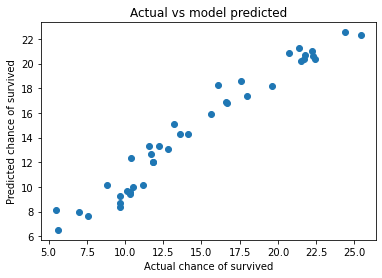

In [172]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of survived')
plt.ylabel('Predicted chance of survived')
plt.title('Actual vs model predicted')
plt.show()

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [141]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model]

In [142]:
for m in model:
    m.fit(x_train,y_train)
    print('mean_absolute_error of ',m ,'model:', mean_absolute_error(y_test,m.predict(x_test)))
    print('mean_square_error of',m,'model:' , mean_squared_error(y_test,m.predict(x_test)))
    print('R2 Score of',m,'model:', r2_score(y_test,m.predict(x_test) )*100)
    print('\n')

mean_absolute_error of  LinearRegression() model: 1.0276646765306134
mean_square_error of LinearRegression() model: 1.5876335108822102
R2 Score of LinearRegression() model: 94.733623324414


mean_absolute_error of  Ridge() model: 1.0351122915406343
mean_square_error of Ridge() model: 1.6222667430068227
R2 Score of Ridge() model: 94.61874061085886


mean_absolute_error of  Lasso() model: 1.762573843353754
mean_square_error of Lasso() model: 4.900045562813007
R2 Score of Lasso() model: 83.74594294941052


mean_absolute_error of  DecisionTreeRegressor() model: 0.6524999999999999
mean_square_error of DecisionTreeRegressor() model: 0.7327499999999997
R2 Score of DecisionTreeRegressor() model: 97.56937764125972


mean_absolute_error of  SVR() model: 0.9454888804931094
mean_square_error of SVR() model: 2.271428749913529
R2 Score of SVR() model: 92.4653899613438


mean_absolute_error of  KNeighborsRegressor() model: 1.0380000000000003
mean_square_error of KNeighborsRegressor() model: 2.2366799

R2 Score of RandomForestRegressor() model 98.09343549521338

Random Forest have highest R2 score and least mean squared error

# Cross Validation

In [143]:
from sklearn.model_selection import cross_val_score

In [144]:
for i in model:
    print('mean_square of ',i, 'model',mean_squared_error(y_test,i.predict(x_test)))
    print("cross Validation score of ",i ," is ",cross_val_score(i,x,y,cv=5, scoring='neg_mean_squared_error').mean())
    print('*'*50,'\n')

mean_square of  LinearRegression() model 1.5876335108822102
cross Validation score of  LinearRegression()  is  -2.784045741315722
************************************************** 

mean_square of  Ridge() model 1.6222667430068227
cross Validation score of  Ridge()  is  -2.784234271134543
************************************************** 

mean_square of  Lasso() model 4.900045562813007
cross Validation score of  Lasso()  is  -4.729982354863848
************************************************** 

mean_square of  DecisionTreeRegressor() model 0.7327499999999997
cross Validation score of  DecisionTreeRegressor()  is  -1.3241576923076925
************************************************** 

mean_square of  SVR() model 2.271428749913529
cross Validation score of  SVR()  is  -2.180486743322023
************************************************** 

mean_square of  KNeighborsRegressor() model 2.236679999999999
cross Validation score of  KNeighborsRegressor()  is  -1.5523787692307693
**********

mean_square of  RandomForestRegressor() model 0.574764375000001

cross Validation score of  RandomForestRegressor()  is  -0.66404345153846

R2 Score of RandomForestRegressor() model 98.09343549521338

RandomForestRegressor is giving the best result here

# Hyperparameter tuning

In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [146]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [147]:
#final model training
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

89.16041927402829

In [148]:
from sklearn.linear_model import Ridge, Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
rg=Ridge()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [149]:
#final model training
rg=Ridge(alpha=0.0001,random_state=0)
rg.fit(x_train,y_train)
rg_score_training=rg.score(x_train,y_train)
pred_rg=rg.predict(x_test)
rg_score_training*100

89.1604193646336

# Ensemble Technique

In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [156]:
rf_model=RandomForestRegressor(criterion="mae",max_features="auto")
rf_model.fit(x_train,y_train)
rf_model.score(x_train,y_train)
pred_decision=rf_model.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

R2 Score: 98.33265774581544


In [157]:
print('mean_square_error of GrieSearchCV model' , mean_squared_error(y_test,pred_decision))
print('R2 Score of Grid Search CV model', r2_score(y_test,pred_decision )*100)

mean_square_error of GrieSearchCV model 0.5026470000000003
R2 Score of Grid Search CV model 98.33265774581544


Mean squared error : 0.46587792499999897

R2 score : 98.45462531429747

Little bit improvement

In [159]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=50,learning_rate=3)
ab.fit(x_train,y_train)
ab.score(x_train,y_train)
pred_decision=ab.predict(x_test)
ab=r2_score(y_test,pred_decision)
print('R2 Score:',ab*100)

R2 Score: 83.39447897938742


# Saving the model

In [160]:
import joblib
joblib.dump(rf_model,'Advertising_sales.obj')

['Advertising_sales.obj']

In [161]:
loaded_model=joblib.load('Advertising_sales.obj')

In [164]:
test_pred=loaded_model.predict(x_test)
test_pred

array([17.627,  6.635, 23.13 , 19.608, 16.093, 21.45 , 21.366, 12.69 ,
       23.453,  8.655, 22.917, 24.994, 10.783, 19.785, 22.808,  7.535,
       12.462, 10.603, 15.477, 10.643,  7.064, 14.706, 11.447, 10.878,
       20.275, 11.99 , 11.473, 10.212, 10.819, 21.985, 12.908, 10.829,
       16.466,  6.358, 10.047, 12.014,  9.694, 12.243, 15.646, 15.182])

In [167]:
y_test

164    18.0
23      5.6
70     22.3
194    19.6
41     16.6
94     22.2
40     21.5
147    13.2
16     22.4
73      8.8
85     21.7
37     25.4
158    10.1
43     20.7
18     24.4
122     7.0
84     13.6
2      10.4
155    15.6
7      11.8
173     7.6
113    14.1
136    11.6
187    10.3
31     21.4
168    12.2
91     11.2
14      9.7
146    10.3
112    21.8
198    12.8
30     10.5
185    17.6
57      5.5
197     9.7
81     11.8
25      9.7
178    11.7
90     16.7
151    16.1
Name: sales, dtype: float64